In [4]:
%matplotlib inline


# Filtering regional maxima


Here, we use morphological reconstruction to create a background image, which
we can subtract from the original image to isolate bright features (regional
maxima).

First we try reconstruction by dilation starting at the edges of the image. We
initialize a seed image to the minimum intensity of the image, and set its
border to be the pixel values in the original image. These maximal pixels will
get dilated in order to reconstruct the background image.




In [5]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.ndimage import gaussian_filter
from skimage import data
from skimage import img_as_float
from skimage.morphology import reconstruction

import sampleData
from skimage.color import rgb2gray

# Convert to float: Important for subtraction later which won't work with uint8
image = img_as_float(rgb2gray(sampleData.smallBn()))
image = gaussian_filter(image, 1)

seed = np.copy(image)
seed[1:-1, 1:-1] = image.min()
mask = image

dilated = reconstruction(seed, mask, method='dilation')

Subtracting the dilated image leaves an image with just the coins and a
flat, black background, as shown below.



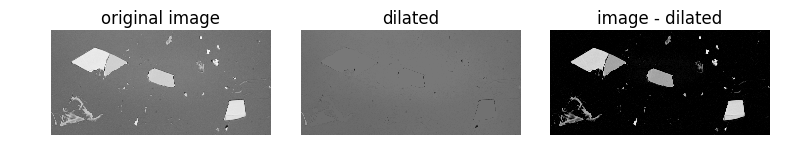

In [6]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1,
                                    ncols=3,
                                    figsize=(8, 2.5),
                                    sharex=True,
                                    sharey=True)

ax0.imshow(image, cmap='gray')
ax0.set_title('original image')
ax0.axis('off')
ax0.set_adjustable('box-forced')

ax1.imshow(dilated, vmin=image.min(), vmax=image.max(), cmap='gray')
ax1.set_title('dilated')
ax1.axis('off')
ax1.set_adjustable('box-forced')

ax2.imshow(image - dilated, cmap='gray')
ax2.set_title('image - dilated')
ax2.axis('off')
ax2.set_adjustable('box-forced')

fig.tight_layout()

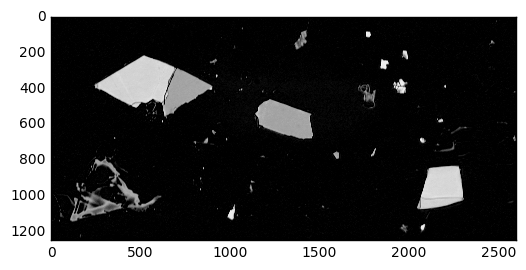

In [11]:
plt.imshow(image - dilated, cmap='gray')

In [8]:
import spencerUtilities

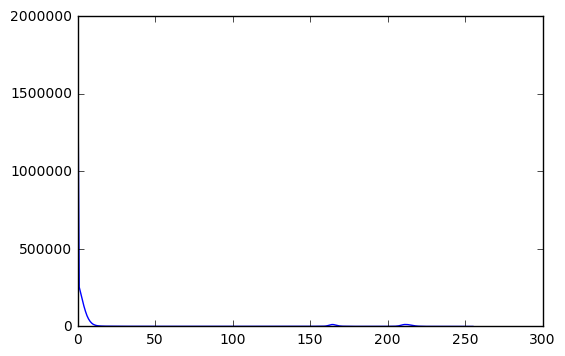

In [12]:
spencerUtilities.plotHistogram(image-dilated)

Although the features (i.e. the coins) are clearly isolated, the coins
surrounded by a bright background in the original image are dimmer in the
subtracted image. We can attempt to correct this using a different seed
image.

Instead of creating a seed image with maxima along the image border, we can
use the features of the image itself to seed the reconstruction process.
Here, the seed image is the original image minus a fixed value, ``h``.



In [13]:
h = 0.4
seed = image - h
dilated = reconstruction(seed, mask, method='dilation')
hdome = image - dilated

To get a feel for the reconstruction process, we plot the intensity of the
mask, seed, and dilated images along a slice of the image (indicated by red
line).



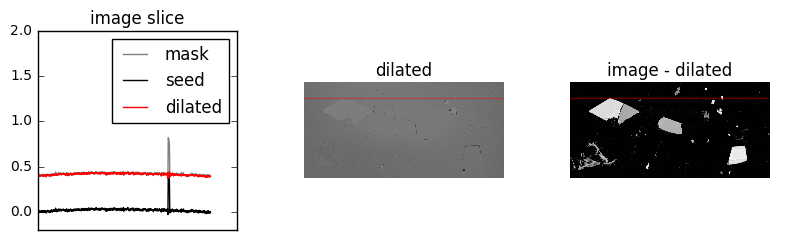

In [14]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, figsize=(8, 2.5))
yslice = 197

ax0.plot(mask[yslice], '0.5', label='mask')
ax0.plot(seed[yslice], 'k', label='seed')
ax0.plot(dilated[yslice], 'r', label='dilated')
ax0.set_ylim(-0.2, 2)
ax0.set_title('image slice')
ax0.set_xticks([])
ax0.legend()

ax1.imshow(dilated, vmin=image.min(), vmax=image.max(), cmap='gray')
ax1.axhline(yslice, color='r', alpha=0.4)
ax1.set_title('dilated')
ax1.axis('off')

ax2.imshow(hdome, cmap='gray')
ax2.axhline(yslice, color='r', alpha=0.4)
ax2.set_title('image - dilated')
ax2.axis('off')

fig.tight_layout()
plt.show()

As you can see in the image slice, each coin is given a different baseline
intensity in the reconstructed image; this is because we used the local
intensity (shifted by ``h``) as a seed value. As a result, the coins in the
subtracted image have similar pixel intensities. The final result is known
as the h-dome of an image since this tends to isolate regional maxima of
height ``h``. This operation is particularly useful when your images are
unevenly illuminated.

